# Lasso linear regression example

**Example using the lasso linear regression function in the EasyMLR module**

The **lasso** function in the EasyMLR module provides output of regression models and summary statistics using the following methods:

- LassoCV: Lasso using Cross-Validation with coordinate descent  
- LassoLarsCV: Lasso using Cross-Validation with Least Angle Regression
- LassoLarsIC using AIC: Lasso using Least Angle Regression with Akaike Information Criterion
- LassoLarsIC using BIC: Lasso using Least Angle Regression with Bayesian Information Criterion

The **lasso** function standardizes the X input by default. 

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

Before running this notebook, first install the EasyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [1]:
# !pip install git+https://github.com/gjpelletier/EasyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [5]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Lasso regression models, please wait ...


Lasso regression statistics of best models in model_outputs['stats']:


| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     0.13426     |     0.14043     |     0.108304    |     3.95021     |
| r-squared          |     0.527037    |     0.527022    |     0.52711     |     0.503383    |
| adjusted r-squared |     0.513208    |     0.511764    |     0.513283    |     0.494771    |
| n_samples          |   353           |   353           |   353           |   353           |
| df residuals       |   343           |   342           |   343           |   347           |
| df model           |     9           |    10           |     9           |     5           |
| F-statistic        |    42.4684      |    38.1078      |    42.4809      |    70.3454      |
| Prob (F-statistic) |

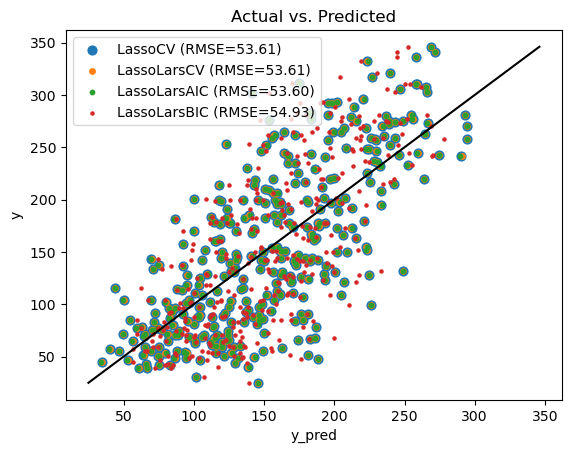

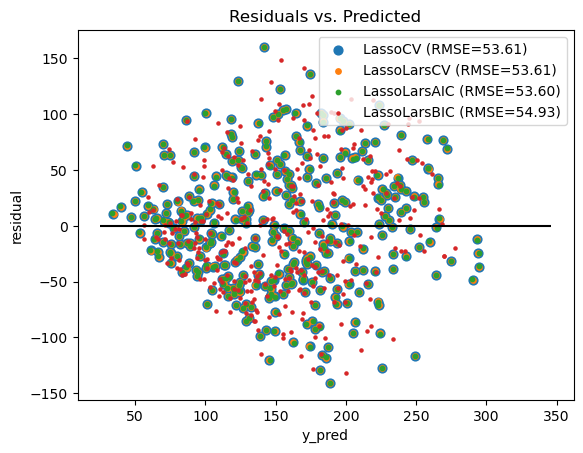

In [7]:
# Use the stacking function in the stepAIC module
from EasyMLR import lasso
train_model, train_output = lasso(X_train, y_train, verbose=1)

## Test the model with the testing data subset

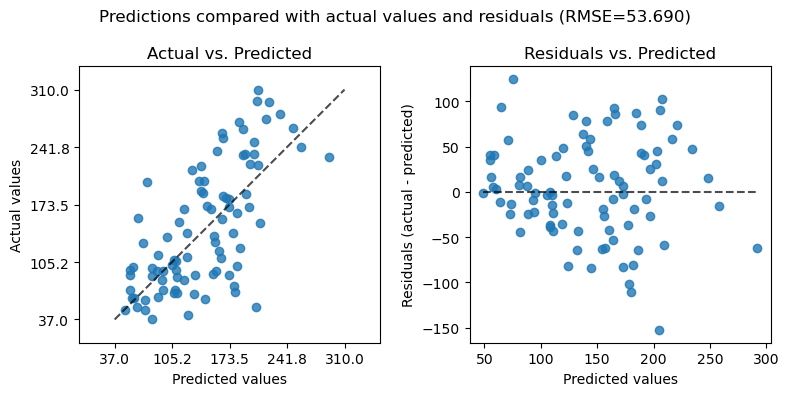

In [8]:
from EasyMLR import plot_predictions_from_test
fig = plot_predictions_from_test(
    train_model['LassoCV'], X_test, y_test, scaler=train_output['scaler'])
fig.savefig("LassoCV_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting Lasso regression models, please wait ...


Lasso regression statistics of best models in model_outputs['stats']:


| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     1.11865     |     1.10767     |     0.950407    |     0.950407    |
| r-squared          |     0.512957    |     0.512989    |     0.51341     |     0.51341     |
| adjusted r-squared |     0.503959    |     0.503991    |     0.50442     |     0.50442     |
| n_samples          |   442           |   442           |   442           |   442           |
| df residuals       |   434           |   434           |   434           |   434           |
| df model           |     7           |     7           |     7           |     7           |
| F-statistic        |    65.2989      |    65.3073      |    65.4173      |    65.4173      |
| Prob (F-statistic) |

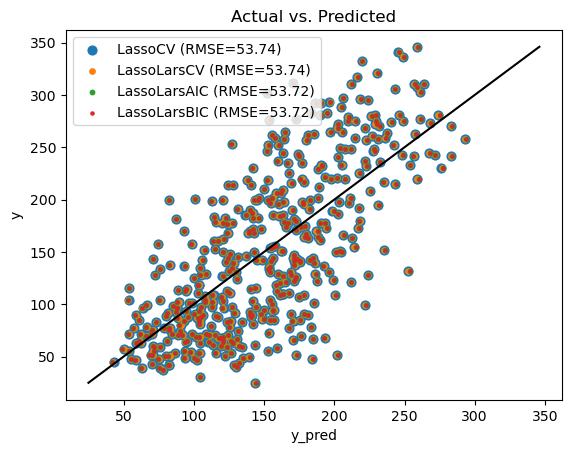

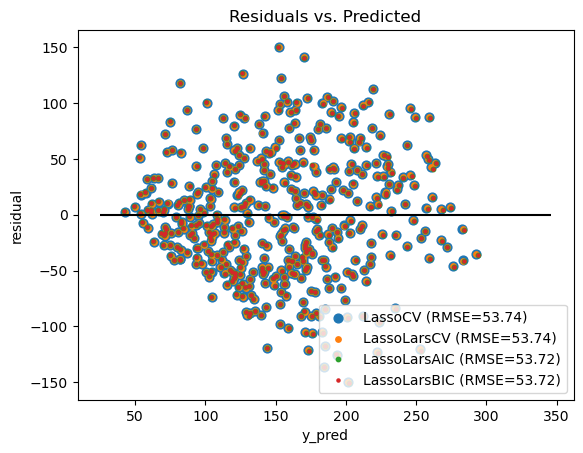

In [9]:
from EasyMLR import lasso
final_model, final_output = lasso(X, y, verbose=1)

## User instructions

In [10]:
help(lasso)

Help on function lasso in module EasyMLR:

lasso(X, y, **kwargs)
    Python function for Lasso linear regression
    using k-fold cross-validation (CV) or to minimize AIC or BIC

    by
    Greg Pelletier
    gjpelletier@gmail.com
    17-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        nfolds= number of folds to use for cross-validation (CV)
            with k-fold LassoCV or LassoLarsCV (default nfolds=20)
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X
        alpha_min= minimum value of range of alphas to evaluate (default=1e-3)
        alpha_max= maximum value of ra